In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200521_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200521_P60

## Si II 6355

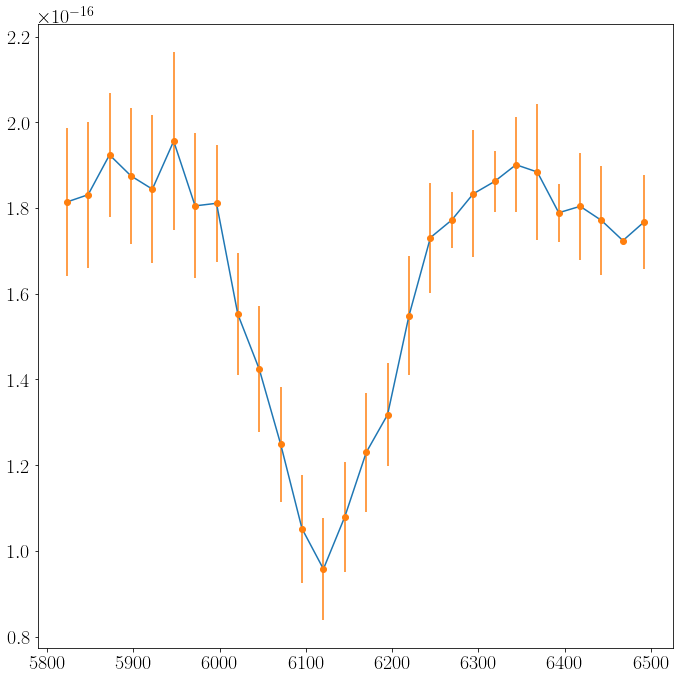

In [4]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5950, 6400, lines=[6371.359, 6347.103])

18 points within 5950.00 and 6400.00 angstroms.


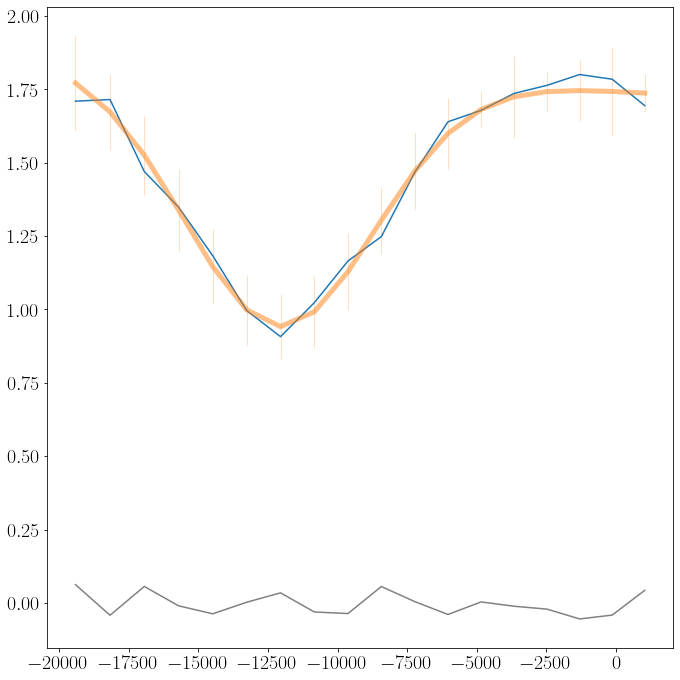

[ 1.73555065e+00  1.86509029e+00 -1.15216261e+04  1.62381905e+01
 -3.73125857e+03]


In [6]:
Spec1.line['SiII_6355'].LS_estimator()

100%|██████████| 1500/1500 [00:17<00:00, 84.83it/s] 


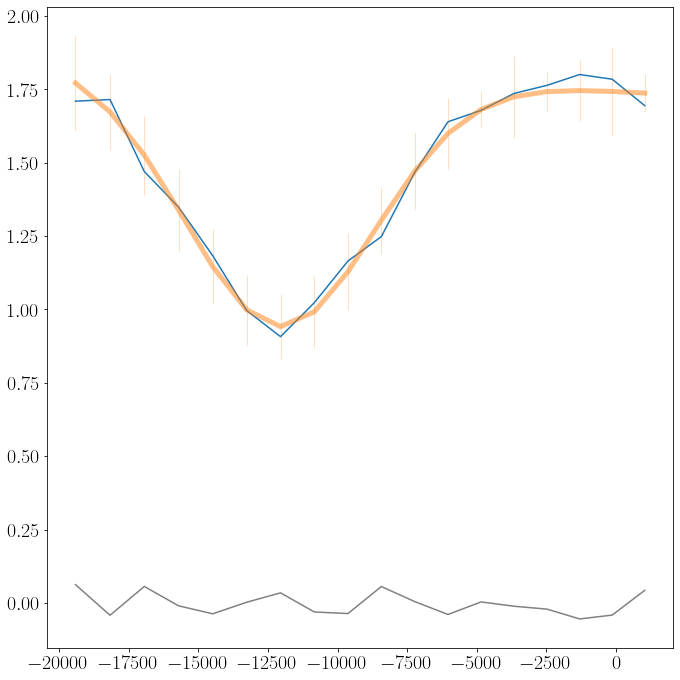

Velocity pvf: -11321 pm 331 km/s


In [7]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

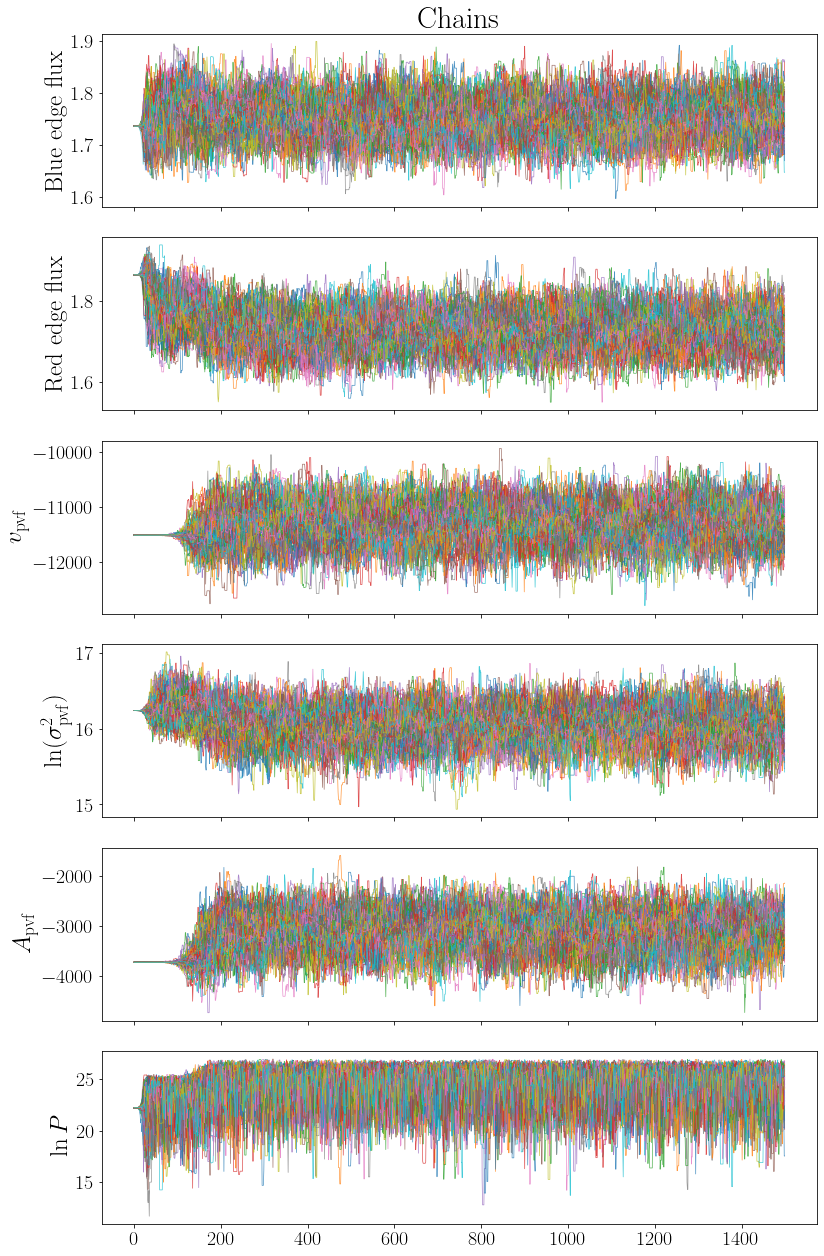

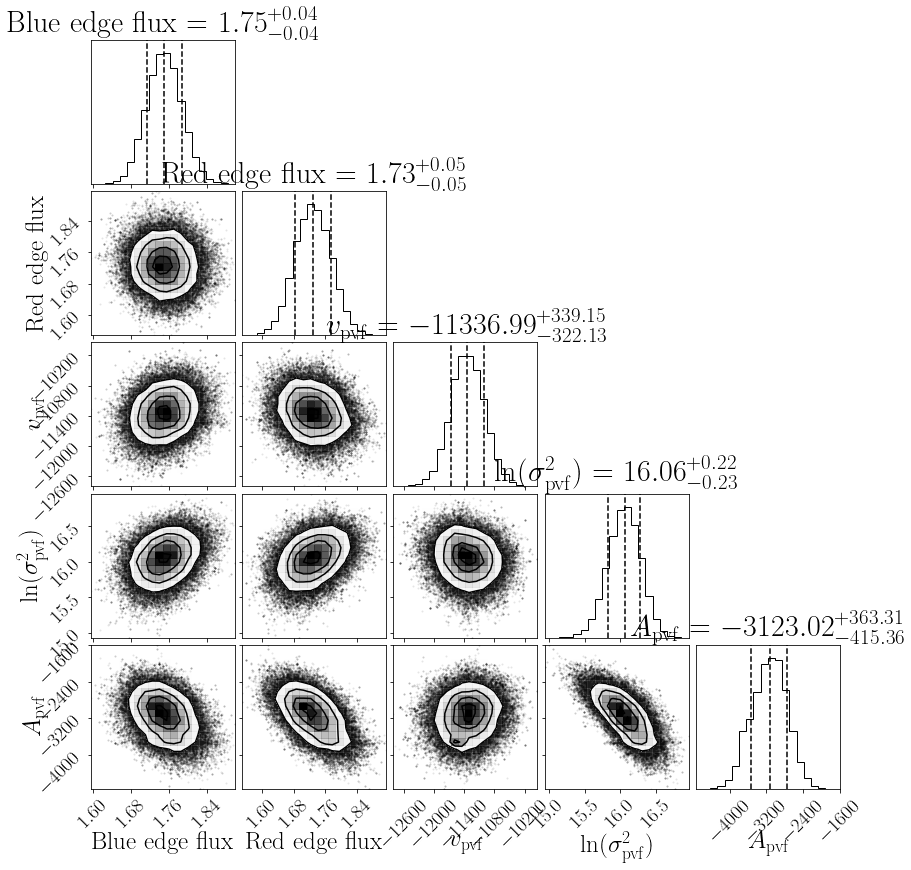

In [8]:
vel.plot_MCMC(sampler, 100)

## Ca II IRT

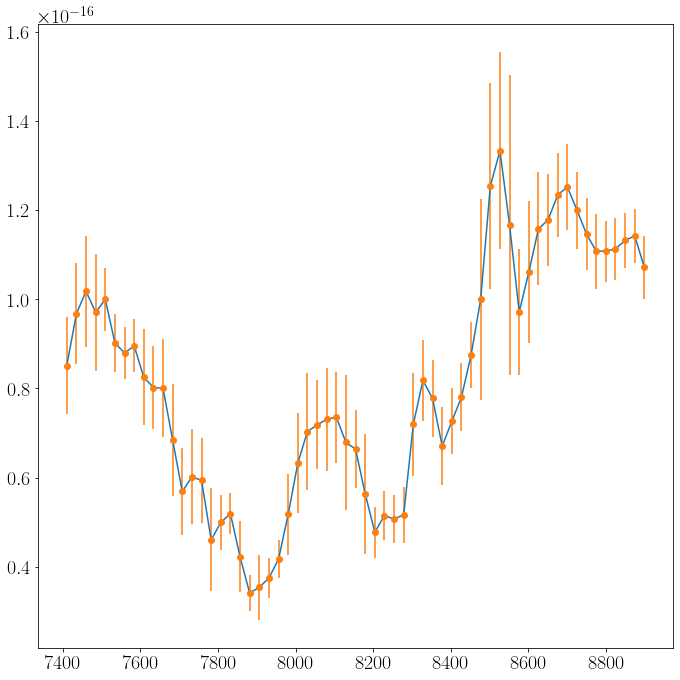

In [9]:
Spec1.plot_line_region(7400, 8900)

In [10]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

44 points within 7600.00 and 8700.00 angstroms.


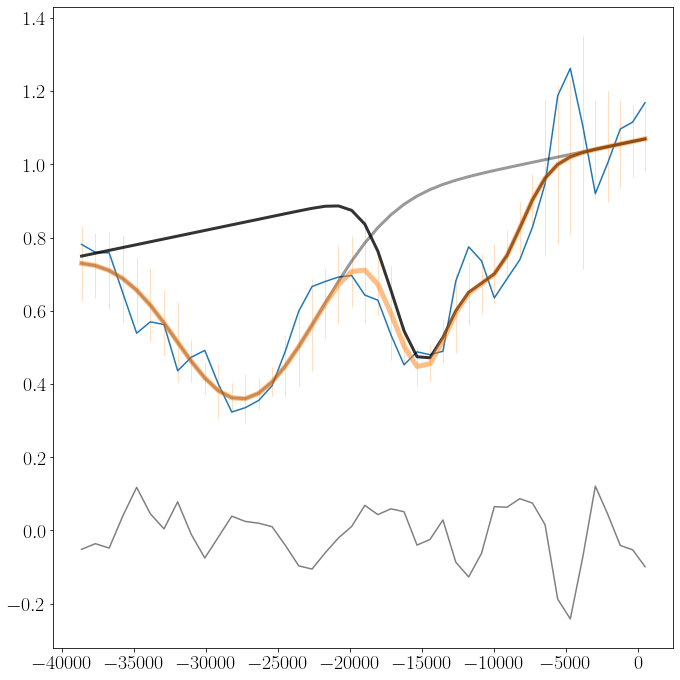

[ 1.07648308e+00  7.46597392e-01 -9.97817539e+03  1.51488437e+01
 -1.24028554e+03 -2.36182779e+04  1.66245408e+01 -1.94130716e+03]


In [11]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -10000, 15, -1000, -25000, 15, -1000))

100%|██████████| 1500/1500 [00:23<00:00, 63.49it/s]


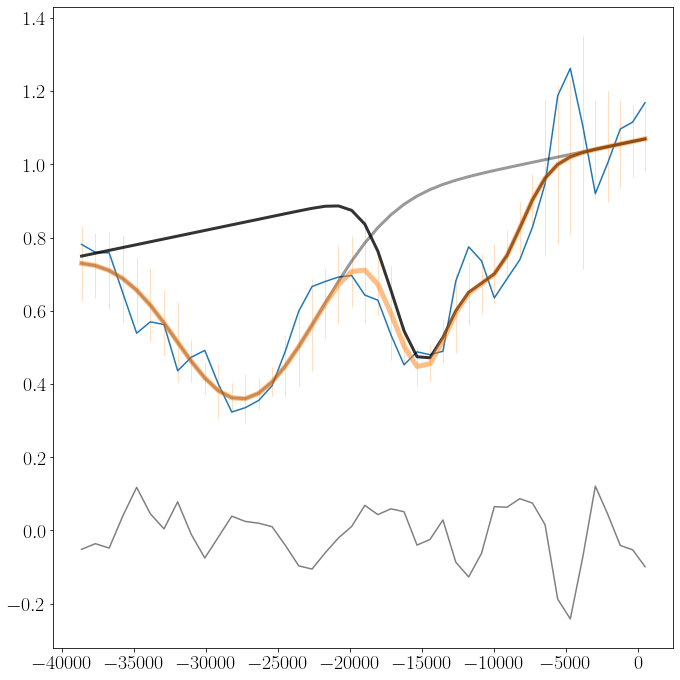

Velocity pvf: -10702 pm 293 km/s
Velocity hvf: -25520 pm 435 km/s


In [12]:
mu_pvf_prior = Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              nburn=500)

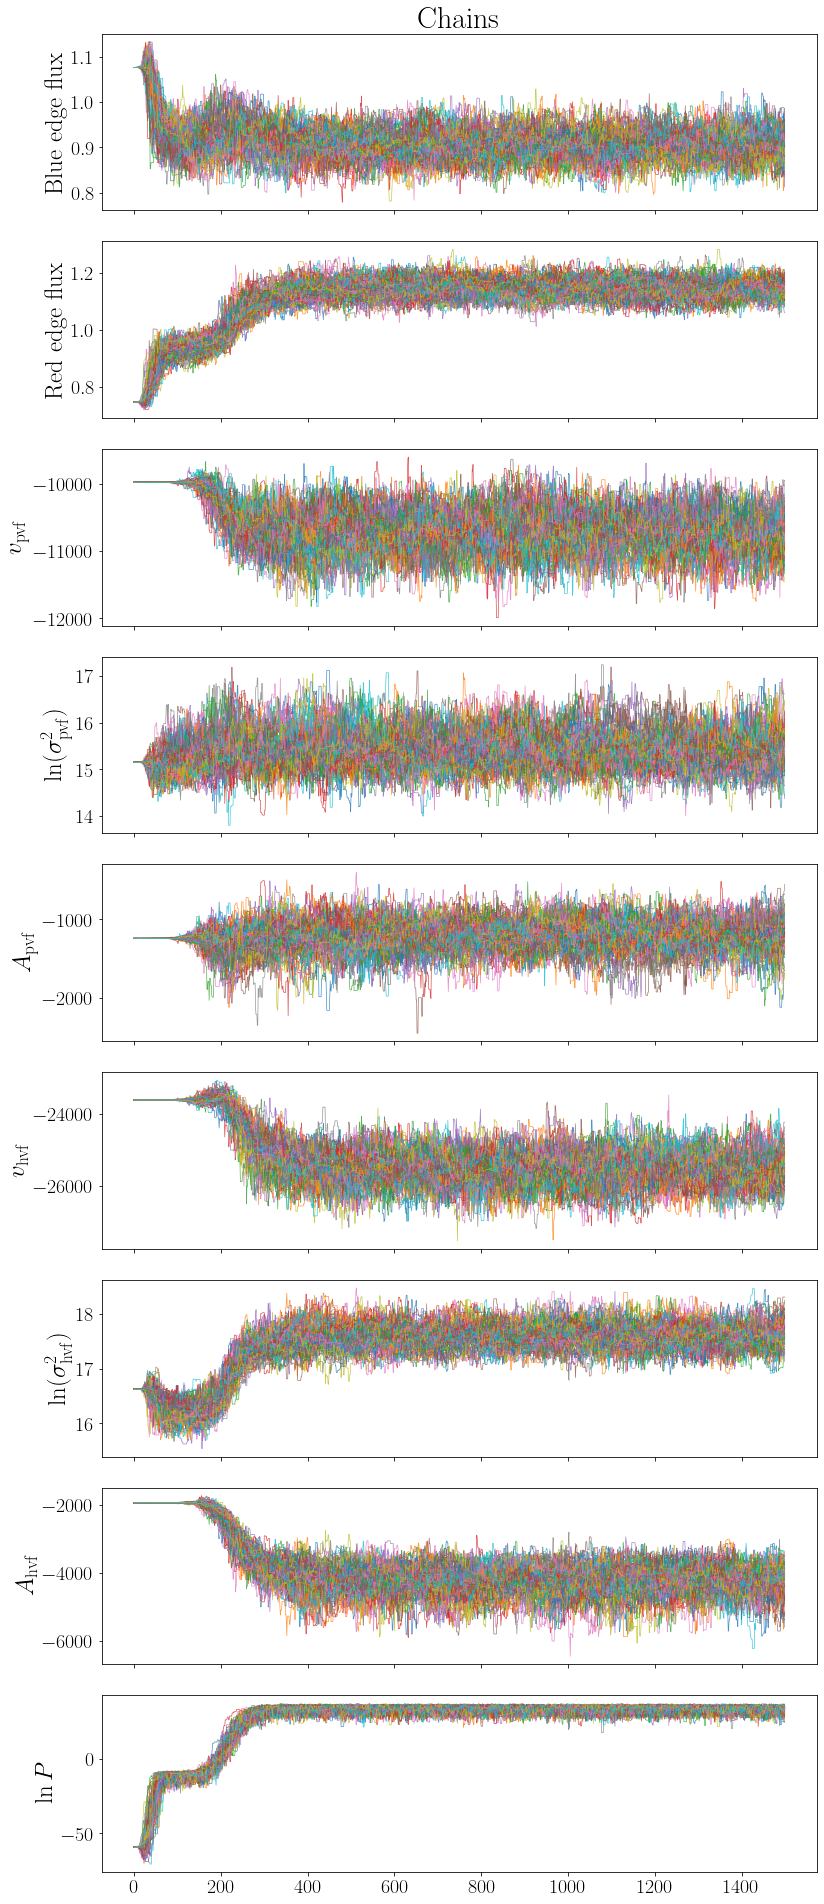

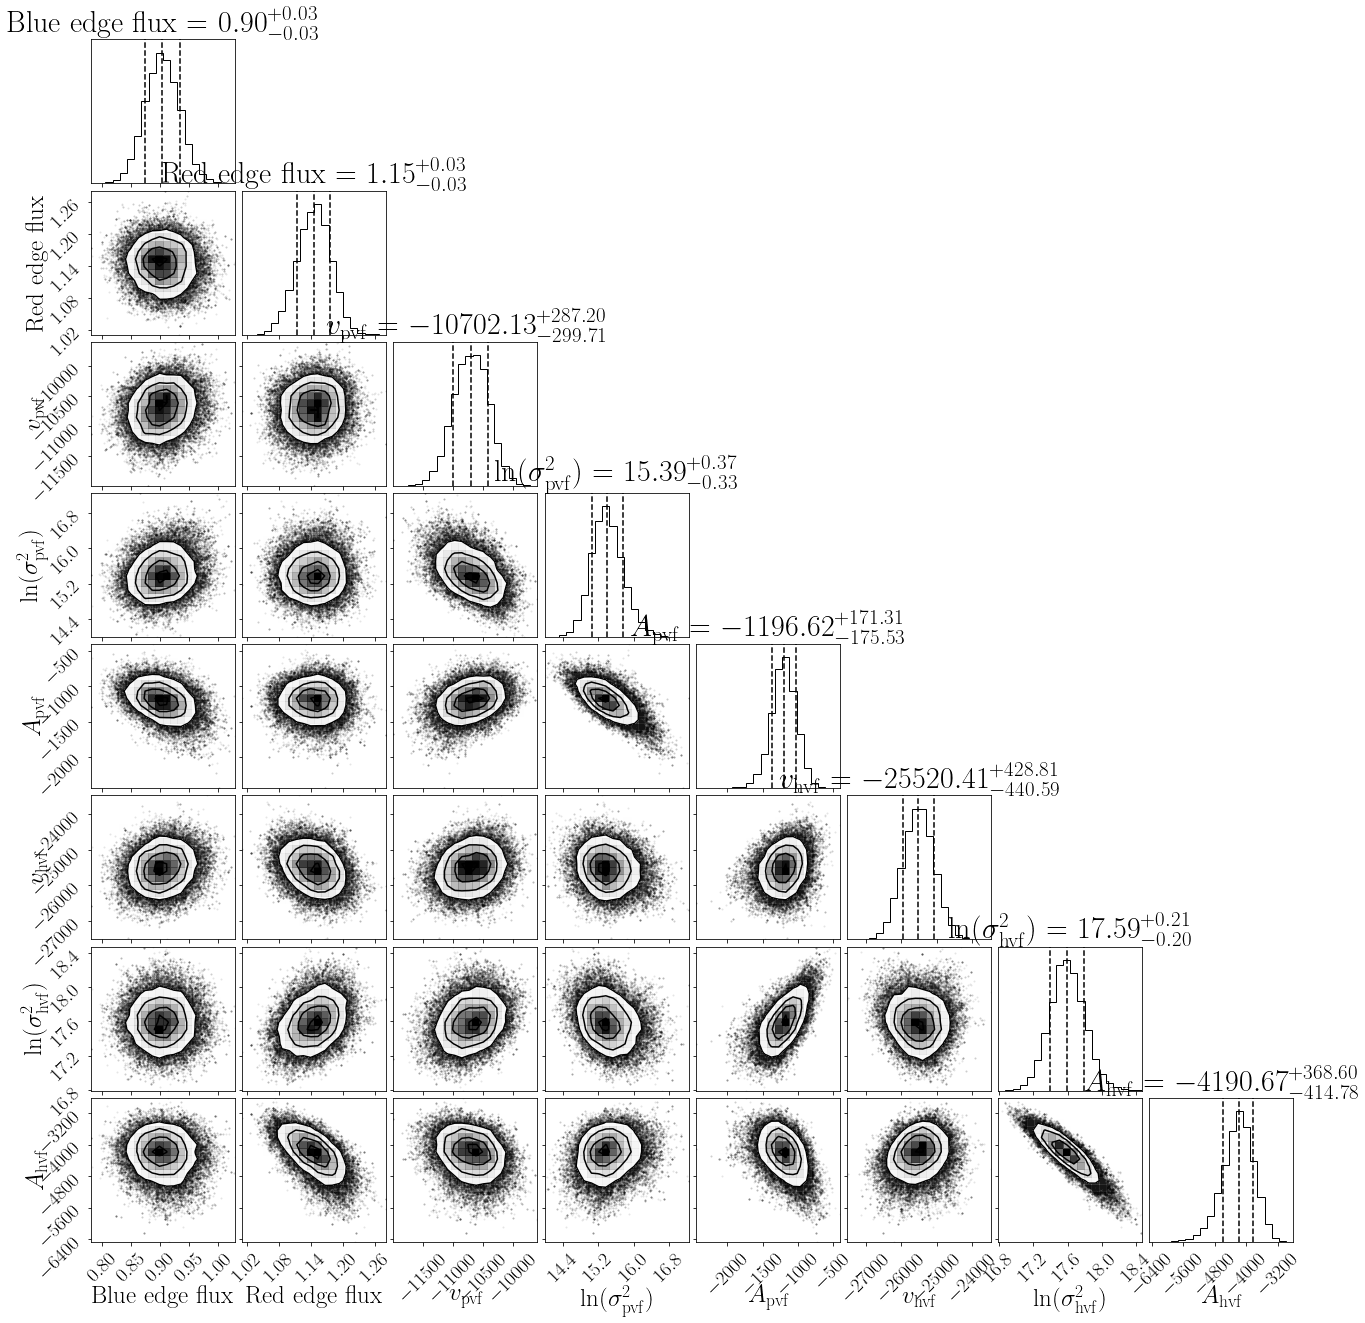

In [13]:
vel.plot_MCMC(sampler, 500)